In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter('ignore', NoAuthWarning)
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl
api = StatsBombLoader(getter="remote", creds={"user": "", "passwd": ""})

# api.games(competition_id=55, season_id=43)
g = 3795506
df_teams = api.teams(game_id=g)
df_players = api.players(game_id=g)
df_events = api.events(game_id=g, load_360=True)
teams = list(df_events['team_name'].unique())
teams_id = list(df_events['team_id'].unique())

df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id=teams_id[0])
df_actions = (
spadl
.add_names(df_actions)
.merge(api.teams(game_id=g))
.merge(api.players(game_id=g))
)
df_actions = df_actions.sort_values(by=['period_id', 'time_seconds'], ascending=[True, True]).reset_index(drop=True)

    nice_time    player_name      type_name    result_name    team_name
--  -----------  ---------------  -----------  -------------  -----------
 0  1m36s        Raheem Sterling  pass         success        England
 1  1m39s        Mason Mount      dribble      success        England
 2  1m40s        Mason Mount      pass         success        England
 3  1m41s        Luke Shaw        dribble      success        England
 4  1m44s        Luke Shaw        pass         success        England
 5  1m45s        Harry Kane       dribble      success        England
 6  1m49s        Harry Kane       pass         success        England
 7  1m52s        Kieran Trippier  dribble      success        England
 8  1m55s        Kieran Trippier  cross        success        England
 9  1m57s        Luke Shaw        shot         success        England


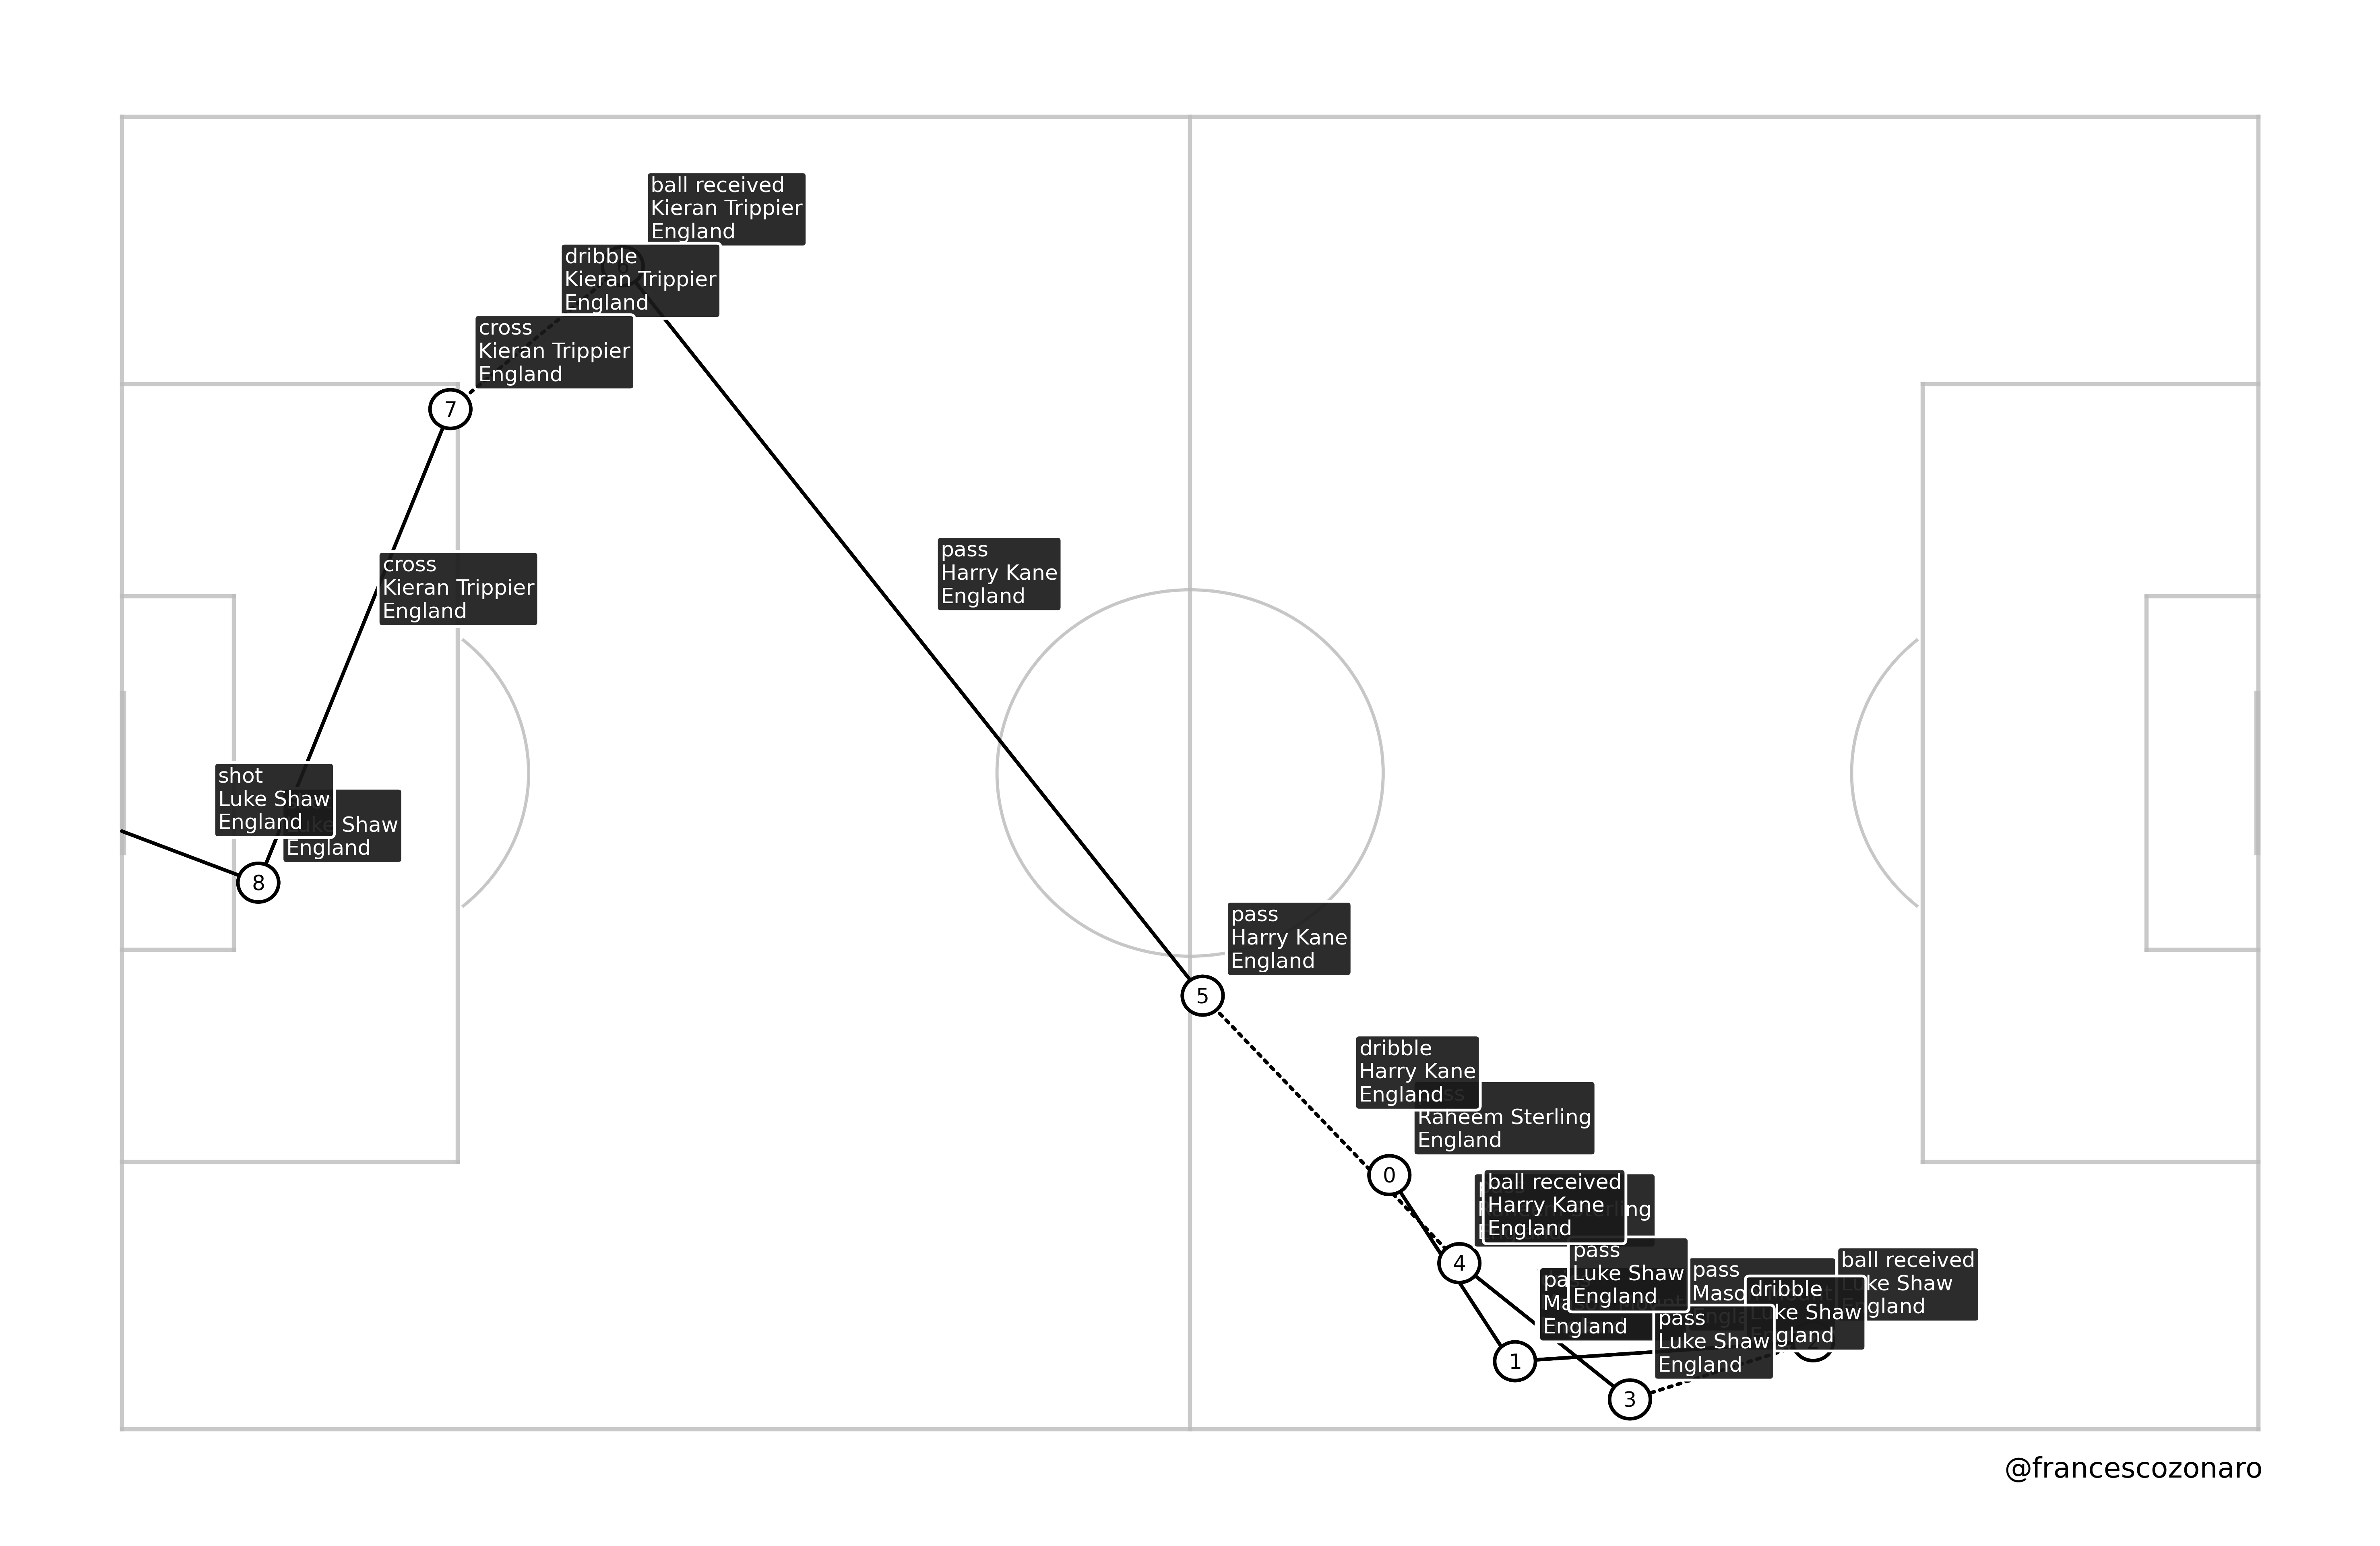

    nice_time    player_name       type_name       result_name    team_name
--  -----------  ----------------  --------------  -------------  -----------
 0  65m33s       Leonardo Bonucci  pass            success        Italy
 1  65m34s       Marco Verratti    dribble         success        Italy
 2  65m37s       Marco Verratti    pass            success        Italy
 3  65m38s       Federico Chiesa   dribble         success        Italy
 4  65m41s       Federico Chiesa   pass            fail           Italy
 5  65m43s       Harry Maguire     clearance       success        England
 6  66m13s       Domenico Berardi  corner_crossed  success        Italy
 7  66m14s       Bryan Cristante   pass            success        Italy
 8  66m16s       Marco Verratti    shot            fail           Italy
 9  66m17s       Leonardo Bonucci  shot            success        Italy


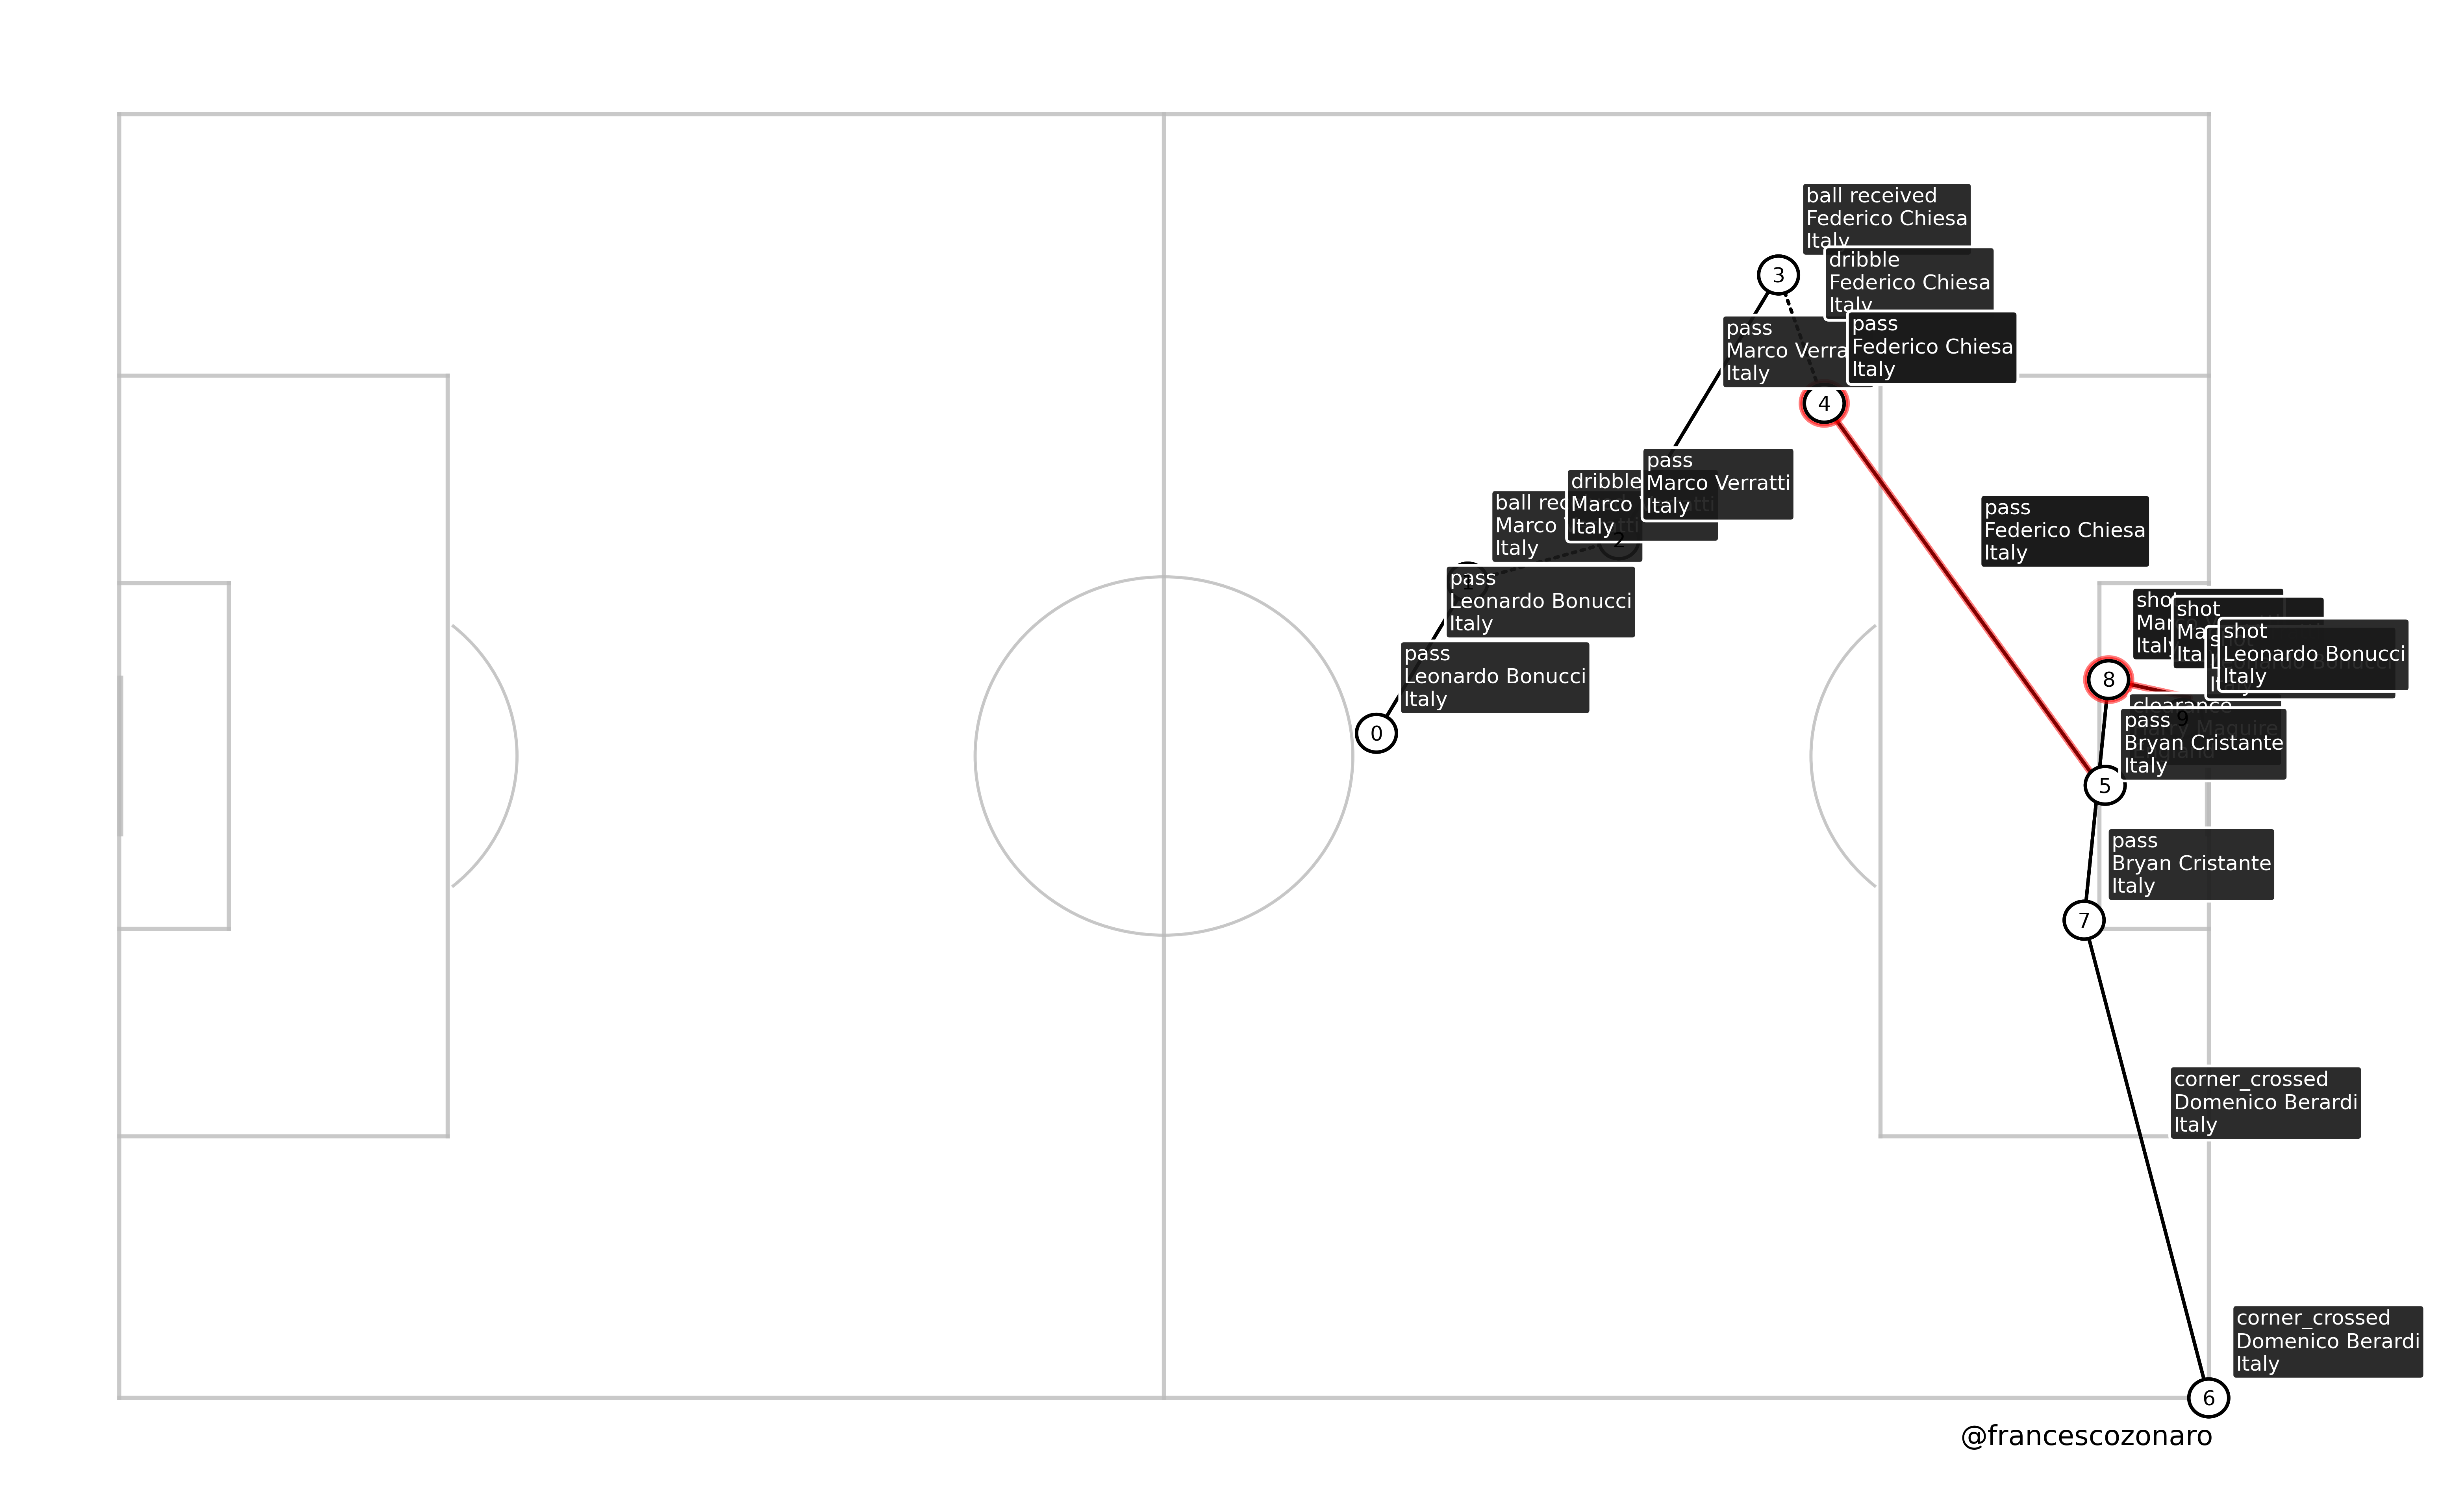

In [3]:
import statsbombplot as sbp

sbp.actions.draw_goals(df_actions)